In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Set the working directory
cbis_path = '/content/drive/MyDrive/colab_scripts/repository/datasets'
os.chdir(cbis_path)

# Confirm current directory
print("Current Directory:", os.getcwd())

Current Directory: /content/drive/MyDrive/colab_scripts/repository/datasets


🔍 Row 0:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/1-271.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.30820586311062570442302321942433426184/1-083.jpg
YOLO BBox: (0.819881, 0.688967, 0.186891, 0.085871)


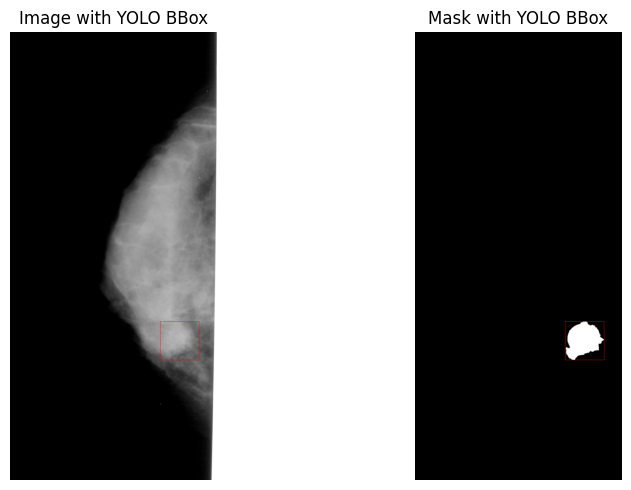

🔍 Row 1:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.85952214611170506017891429690540035518/1-100.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381440141511137044327302306604206077287/1-084.jpg
YOLO BBox: (0.879165, 0.696321, 0.143212, 0.059916)


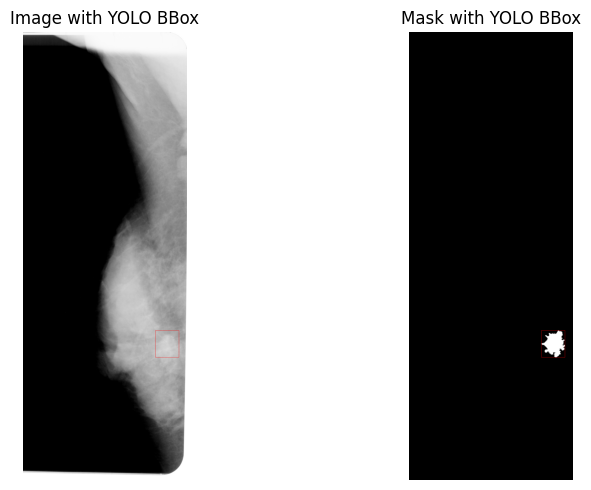

🔍 Row 2:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.22131189612893294827907969600765582967/1-101.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.212143028513012144941507232513982203672/2-085.jpg
YOLO BBox: (0.102656, 0.652778, 0.048438, 0.029472)


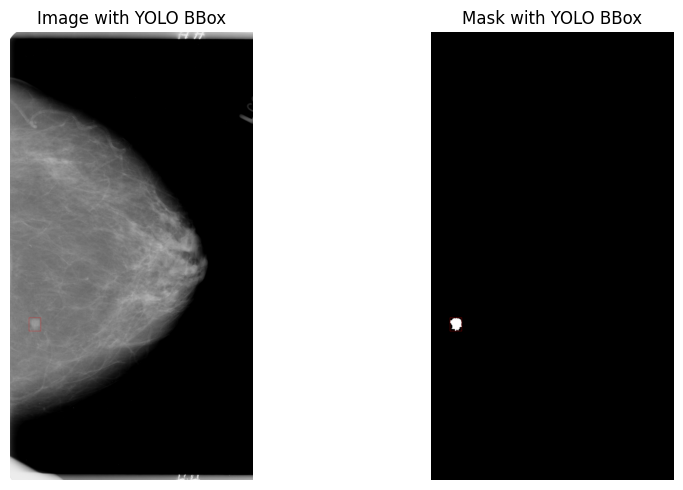

🔍 Row 3:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.239949064412092068706566726490415129934/1-102.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.15403043813402510742192372832381918984/2-086.jpg
YOLO BBox: (0.08935, 0.656082, 0.055191, 0.030242)


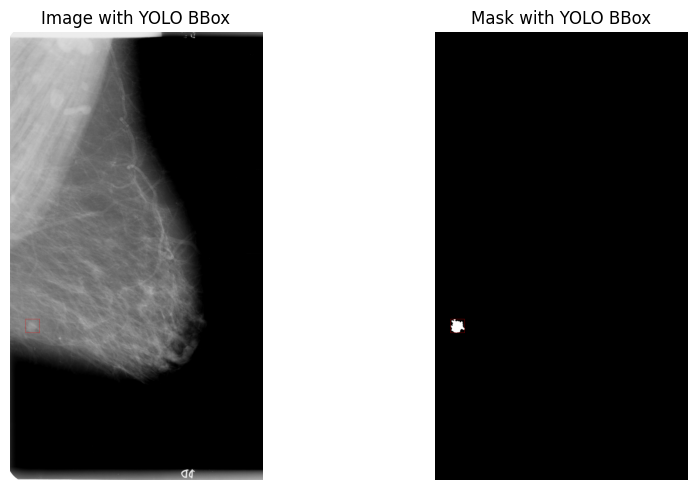

🔍 Row 4:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.215081818713600536113960661873725083371/1-103.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.199593071810497070809647901570077988031/2-087.jpg
YOLO BBox: (0.77092, 0.384773, 0.127225, 0.071345)


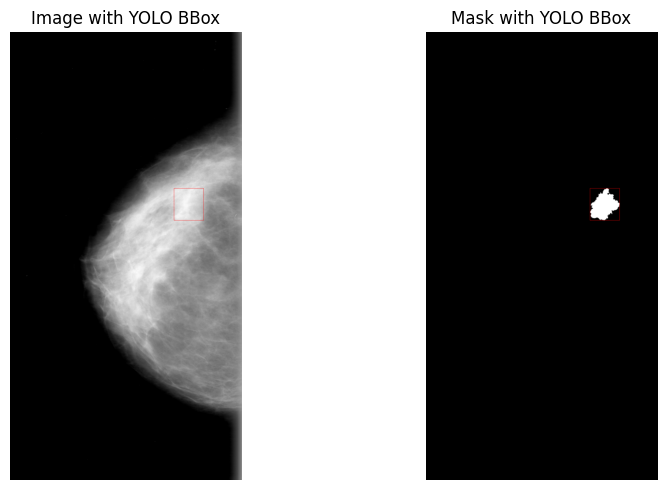

🔍 Row 5:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.318799084911119262430780458250312419361/1-104.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.44610919611642954332266410812181604922/2-088.jpg
YOLO BBox: (0.591352, 0.447176, 0.157619, 0.071072)


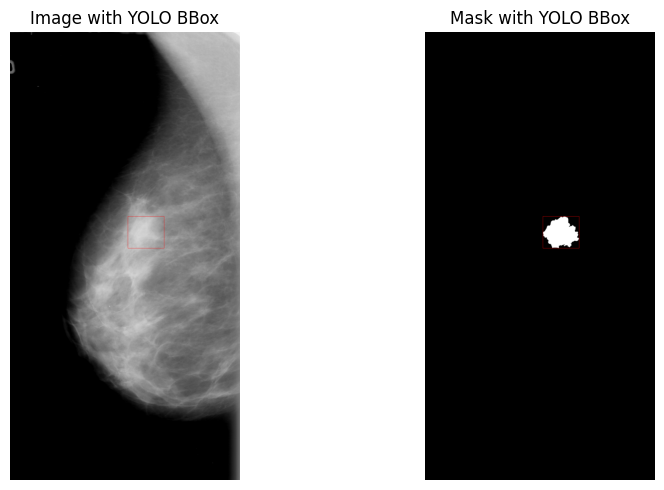

🔍 Row 6:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.345140832810160378520078721331878282316/1-105.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.335564193512609498716387099372607181452/2-089.jpg
YOLO BBox: (0.626873, 0.33865, 0.110014, 0.084418)


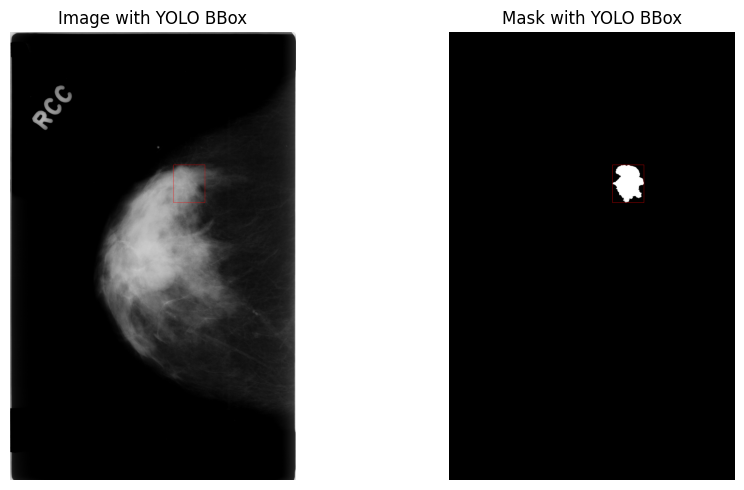

🔍 Row 7:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.59887648512379053809277845872128232362/1-106.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.371211525812372459428004652923830584055/2-090.jpg
YOLO BBox: (0.524249, 0.501401, 0.150956, 0.094181)


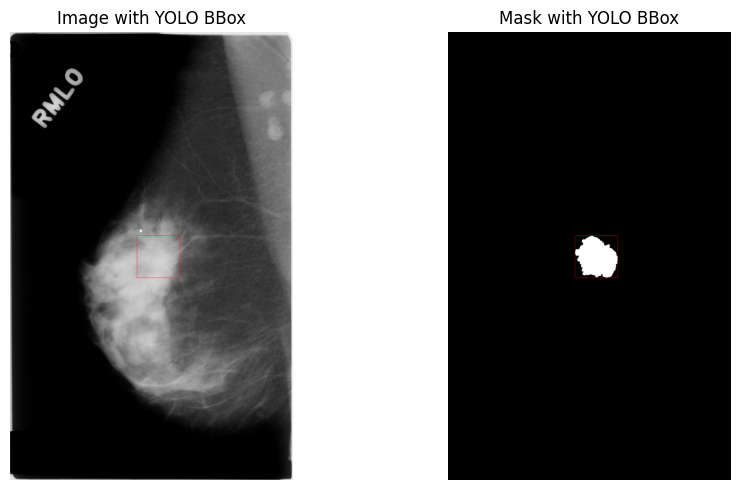

🔍 Row 8:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.302678903112208607702983192631368637142/1-107.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.94222899611000951402700588920137869763/2-091.jpg
YOLO BBox: (0.180177, 0.70973, 0.100136, 0.054935)


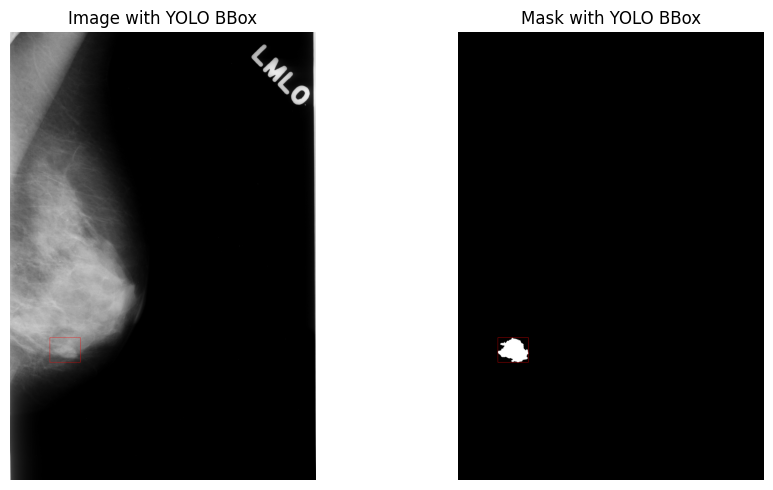

🔍 Row 9:
Image Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.398695186611278204714097118000162925433/1-281.jpg
Mask Path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.90316691111901811331698126462090336197/2-092.jpg
YOLO BBox: (0.883153, 0.5547, 0.122008, 0.052632)


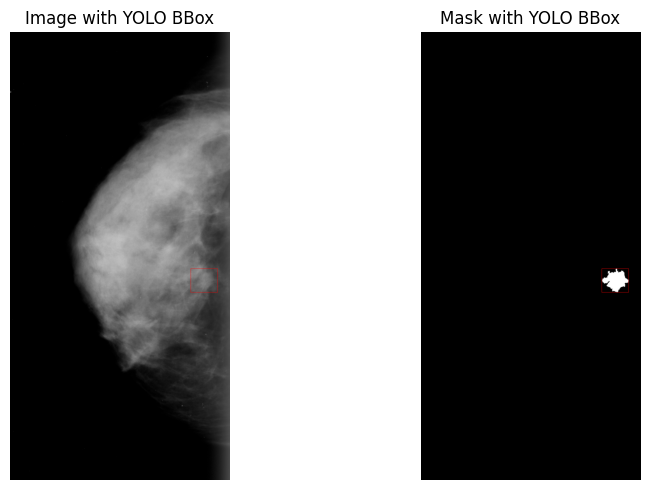

In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from ast import literal_eval

# Load DataFrame
csv_path = 'CBIS-DDSM/csv/mass_test_jpg2_bbox.csv'
df = pd.read_csv(csv_path)

# Convert string bbox to tuple
df['yolo_bbox'] = df['yolo_bbox'].apply(literal_eval)

# Function to draw bbox on an image or mask
def draw_bbox(image_path, yolo_bbox):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print(f"⚠️ Could not read: {image_path}")
        return None

    # Convert grayscale to BGR if necessary
    if len(image.shape) == 2 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    h, w = image.shape[:2]
    x_c, y_c, bw, bh = yolo_bbox

    x_center = x_c * w
    y_center = y_c * h
    box_w = bw * w
    box_h = bh * h

    x1 = int(x_center - box_w / 2)
    y1 = int(y_center - box_h / 2)
    x2 = int(x_center + box_w / 2)
    y2 = int(y_center + box_h / 2)

    if x2 <= x1 or y2 <= y1:
        print("⚠️ Invalid bbox size — skipping.")
        return image

    # Draw red rectangle
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    return image

# Iterate and show bbox on image and mask side by side
for idx, row in df.head(10).iterrows():
    img_path = row['jpg image file path']
    mask_path = row['jpg ROI mask file path']
    bbox = row['yolo_bbox']

    print(f"🔍 Row {idx}:")
    print(f"Image Path: {img_path}")
    print(f"Mask Path: {mask_path}")
    print(f"YOLO BBox: {bbox}")

    img_with_bbox = draw_bbox(img_path, bbox)
    mask_with_bbox = draw_bbox(mask_path, bbox)

    if img_with_bbox is None or mask_with_bbox is None:
        continue

    # Show side-by-side comparison
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image with YOLO BBox")
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(mask_with_bbox, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Mask with YOLO BBox")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Optional: Pause or limit number of images
    # break  # Uncomment to stop after first image